><font size = 15> **Importing Libraries and Dataset**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'J:\Simplii Learn DS\Data Science with Python\Assessment Files\Comcast_telecom_complaints_data.csv')

In [4]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


In [6]:
df.shape

(2224, 11)

In [7]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

><font size = 15> **Data Wrangling**

In [8]:
df['date_index'] = df["Date_month_year"] + " " + df["Time"]

In [9]:
df['date_index'] = pd.to_datetime(df['date_index'])
df['Date_month_year'] = pd.to_datetime(df['Date_month_year'])

In [10]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [11]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [12]:
df = df.set_index(df['date_index'])

In [13]:
df.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


#### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [14]:
df['Date_month_year'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
2015-06-29     51
2015-06-18     47
2015-12-06     43
2015-06-27     39
2015-06-15     34
2015-06-17     32
2015-06-13     32
2015-06-22     30
2015-06-19     29
2015-05-06     29
2015-06-16     29
2015-08-04     28
2015-02-04     27
2015-06-28     27
2015-05-26     27
2015-04-28     26
2015-05-28     26
2015-04-27     25
2015-02-06     25
2015-03-06     25
2015-01-06     25
2015-07-04     25
2015-10-06     25
2015-08-06     24
2015-04-24     24
             ... 
2015-06-04     13
2015-04-04     12
2015-04-05     12
2015-05-13     12
2015-04-21     12
2015-01-05     12
2015-04-06     12
2015-06-21     12
2015-05-19     12
2015-05-15     12
2015-11-05     12
2015-04-15     12
2015-05-23     12
2015-05-25     12
2015-09-05     11
2015-06-06     11
2015-05-31     10
2015-07-06      9
2015-04-19      9
2015-05-30      9
2015-04-26      8
2015-04-18      8
2015-05-24      7
2015-10-05      7
2015-02-05

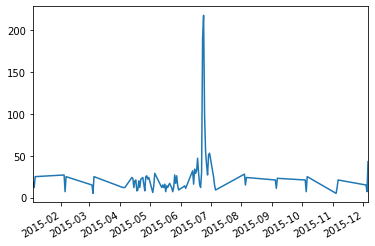

In [15]:
df['Date_month_year'].value_counts().plot()

Monthly trend chart of Consumer Complaints

In [18]:
monthly = df.groupby(pd.Grouper(freq = 'M')).size()
monthly.head()

date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

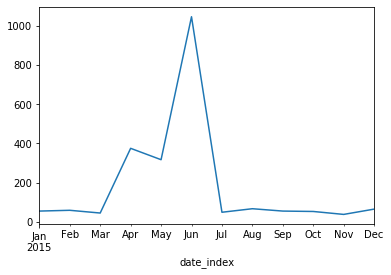

In [19]:
#Monthly Chart
df.groupby(pd.Grouper(freq = 'M')).size().plot()

Daily trend chart of Consumer Complaints

In [21]:
Daily = df.groupby(pd.Grouper(freq = 'D')).size()
Daily.head()

date_index
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-01-07     0
2015-01-08     0
Freq: D, dtype: int64

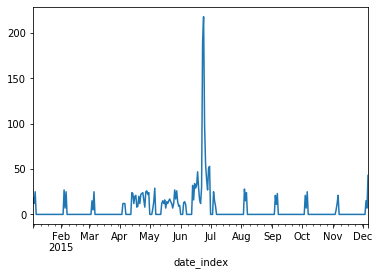

In [22]:
#Daily Chart
df.groupby(pd.Grouper(freq = 'D')).size().plot()

### Provide a table with the frequency of complaint types.

In [23]:
df.groupby(['Customer Complaint']).size().sort_values(ascending = False).to_frame().reset_index().rename({0: 'count'}, axis = 1),

(                                     Customer Complaint  count
 0                                               Comcast     83
 1                                      Comcast Internet     18
 2                                      Comcast Data Cap     17
 3                                               comcast     13
 4                                     Comcast Data Caps     11
 5                                       Comcast Billing     11
 6                                             Data Caps     11
 7                              Unfair Billing Practices      9
 8                                       Comcast/Xfinity      8
 9                                      Comcast internet      8
 10                                       Internet speed      8
 11                                    Comcast data caps      8
 12                                     Comcast data cap      8
 13                                             Data Cap      8
 14                                     

### Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

>- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
>- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Creating table for maximum complaint types

In [25]:
df.groupby(['Customer Complaint']).size().sort_values(
    ascending = False).to_frame().reset_index().rename({0:'Count'}, axis = 1).max()

Customer Complaint    xfinity customer service
Count                                       83
dtype: object

so the maximum consumer complaint is xfinity customer service = 83

Creating Open, Close and Pending Status for Consumer Complaints to be Categorized

In [26]:
df['newStatus'] = ['Open' if Status == 'Open' or Status == 'Pending' else 'Closed' for Status in df['Status']]

In [27]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


Creating State wise Consumer Complaints

In [28]:
df.groupby(['State']).size().sort_values(ascending = False).to_frame().reset_index().rename({0: 'Count'}, axis = 1)

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


Creating Stat wise and Status wise Consumer Complaints

In [29]:
Status_com = df.groupby(['State', 'newStatus']).size().unstack().fillna(0)
Status_com

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


Creating a Bar Chart

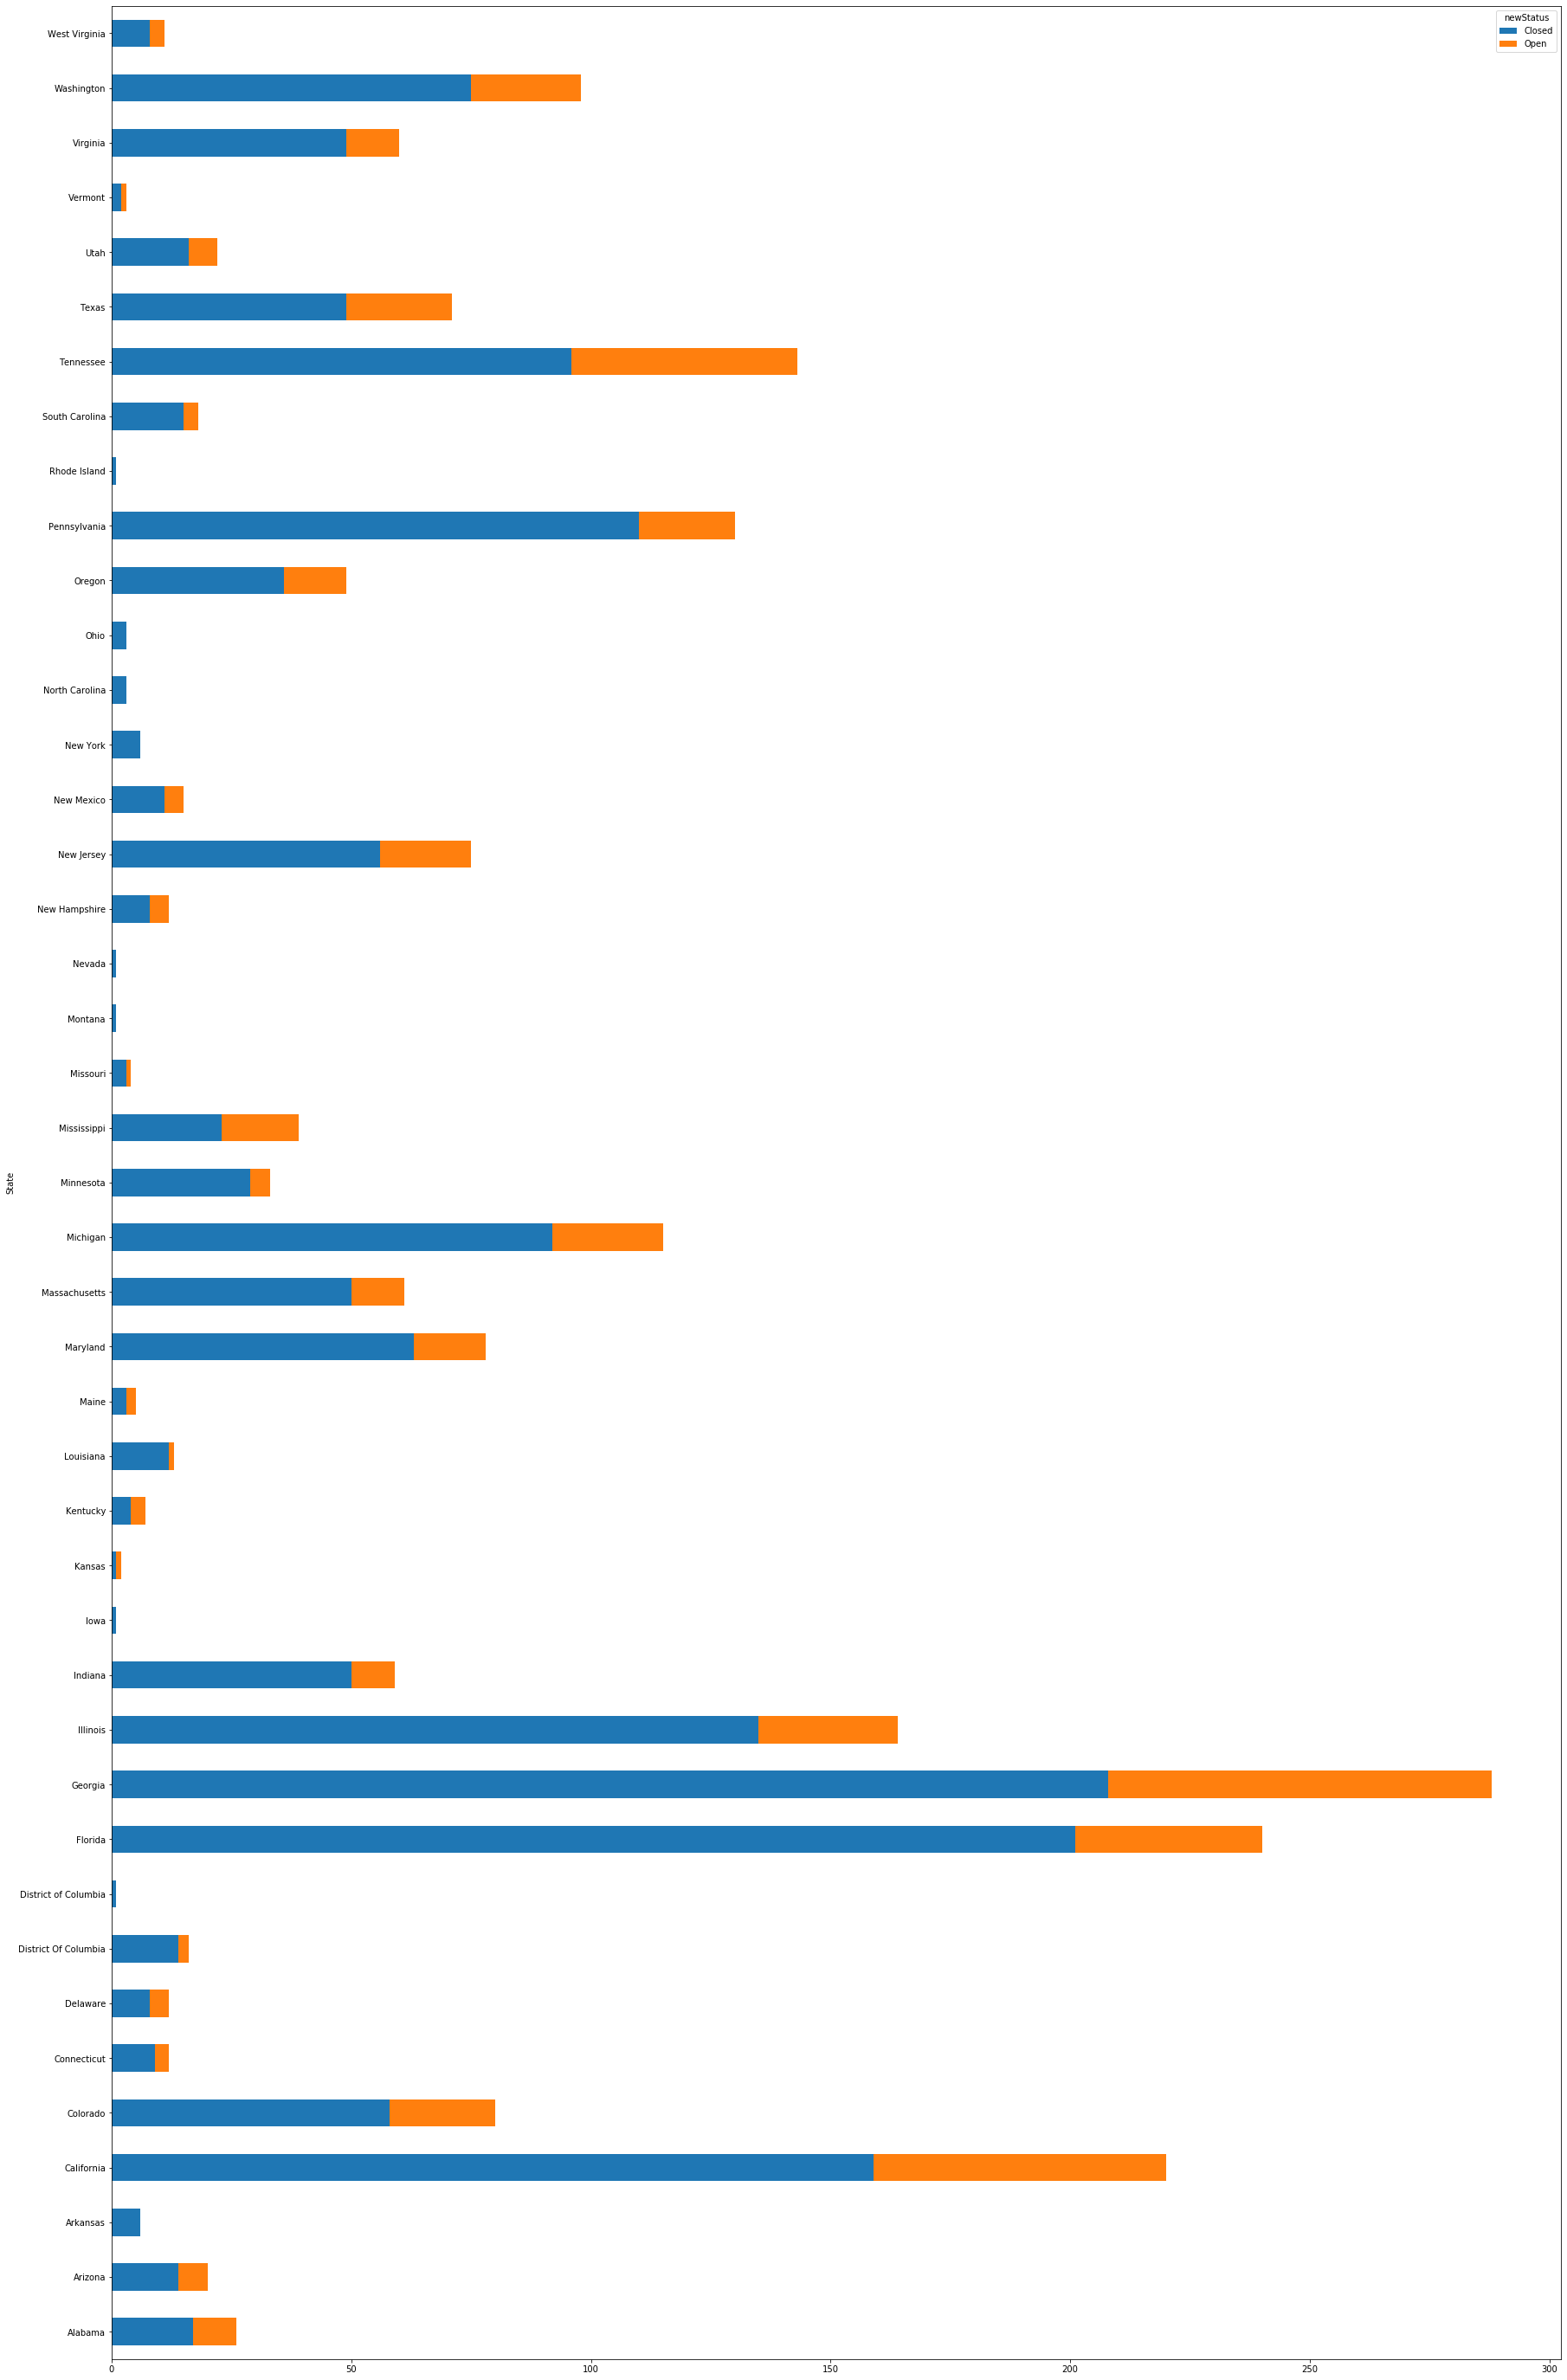

In [40]:
Status_com.plot(kind = 'barh', figsize = (30,50), stacked = True)

### Which state has the maximum complaints

In [43]:
df.groupby(['State']).size().sort_values(ascending = False).to_frame().reset_index().rename({0:'Count'}, 
                                                                                            axis = 1).max()

State    West Virginia
Count              288
dtype: object

In [44]:
df.groupby(['State','newStatus']).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

### Importing Natural Language Processing

In [45]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhijeet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [76]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [77]:
import nltk 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abhijeet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [78]:
doc_complete = df['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [67]:
import gensim
from gensim import corpora

In [79]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [80]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [70]:
from gensim.models import LdaModel

### Which state has the highest percentage of unresolved complaints
>- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [81]:
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics = Num_Topic, id2word = dictionary, passes = 30)

In [83]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.151*"data" + 0.145*"cap" + 0.124*"comcast" + 0.057*"internet" + 0.040*"throttling" + 0.030*"price" + 0.011*"broadband" + 0.009*"said" + 0.009*"12" + 0.009*"people"')

(1, '0.052*"connection" + 0.039*"lack" + 0.037*"false" + 0.033*"billed" + 0.028*"unreliable" + 0.028*"xfinitycomcast" + 0.026*"slowing" + 0.023*"service" + 0.018*"day" + 0.018*"term"')

(2, '0.263*"service" + 0.143*"comcast" + 0.083*"internet" + 0.046*"complaint" + 0.034*"customer" + 0.022*"billing" + 0.011*"account" + 0.010*"help" + 0.009*"terrible" + 0.008*"failure"')

(3, '0.115*"issue" + 0.081*"comcast" + 0.069*"slow" + 0.052*"internet" + 0.026*"monopoly" + 0.023*"switch" + 0.019*"contract" + 0.018*"high" + 0.017*"bait" + 0.016*"several"')

(4, '0.042*"comcastxfinity" + 0.042*"deceptive" + 0.033*"charged" + 0.032*"fraudulent" + 0.028*"back" + 0.026*"incorrect" + 0.025*"false" + 0.025*"advertising" + 0.023*"misleading" + 0.023*"get"')

(5, '0.190*"internet" + 0.129*"speed" + 0.107*"comcast" + 0.032*"cable" + 0.0

In [84]:
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn = 30)
    word_dict["Topic #" + "{}".format(i)] = [i[0] for i in words]

In [85]:
pd.DataFrame(word_dict)

,Topic #0,Topic #1,Topic #2,Topic #3,Topic #4,Topic #5,Topic #6,Topic #7,Topic #8
0,data,connection,service,issue,comcastxfinity,internet,comcast,billing,comcast
1,cap,lack,comcast,comcast,deceptive,speed,charge,comcast,service
2,comcast,false,internet,slow,charged,comcast,xfinity,practice,poor
3,internet,billed,complaint,internet,fraudulent,cable,usage,unfair,without
4,throttling,unreliable,customer,monopoly,back,bill,data,pricing,problem
5,price,xfinitycomcast,billing,switch,incorrect,paying,contract,fee,refund
6,broadband,slowing,account,contract,false,outage,payment,complaint,customer
7,said,service,help,high,advertising,cramming,equipment,monopolistic,bill
8,12,day,terrible,bait,misleading,business,cancelling,monthly,show
9,people,term,failure,several,get,bandwidth,hbo,modem,charging
